# FIRST TRANSFER LEARNING

In [5]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-06-07 01:02:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   225MB/s    in 0.3s    

2023-06-07 01:02:06 (225 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip cats_and_dogs_filtered.zip

In [7]:
!rm -rf cats_and_dogs_filtered.zip

In [ ]:
!pip install tensorflow

In [33]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
model=MobileNet(weights='imagenet',include_top=False)

In [10]:
x=model.output
x=GlobalAveragePooling2D()(x)

In [11]:
x=Dense(50,activation='relu')(x)
preds=Dense(1,activation='sigmoid')(x) 
model=Model(inputs=model.input,outputs=preds)

In [12]:
for layer in model.layers[:88]:
    layer.trainable=False
for layer in model.layers[88:]:
    layer.trainable=True

In [13]:
batch_size = 32

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.4,
                                   zoom_range = 0.4,
                                   height_shift_range=0.3,
                                   width_shift_range=0.3,
                                   rotation_range=50,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
train = train_datagen.flow_from_directory('cats_and_dogs_filtered/train',
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

validation = test_datagen.flow_from_directory('cats_and_dogs_filtered/validation',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator = train,
                              steps_per_epoch = 8000/batch_size,
                              epochs = 10,
                              validation_data = validation,
                              validation_steps = 2000/batch_size)

In [18]:
ls cats_and_dogs_filtered/new_test

friend_of_men.jpg


In [23]:
#test_image = image.load_img('cats_and_dogs_filtered/new_test/friend_of_men.jpg', target_size = (224, 224))
test_image = tf.keras.utils.load_img('cats_and_dogs_filtered/new_test/friend_of_men.jpg', target_size = (224, 224))

#test_image = image.img_to_array(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image/255

1/1 [==============================] - 0s 57ms/step
dog


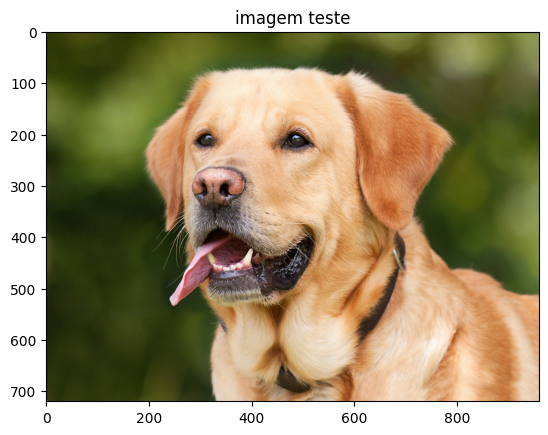

In [37]:
result = model.predict(test_image)

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

#plotar
img = mpimg.imread('cats_and_dogs_filtered/new_test/friend_of_men.jpg')
imgplot = plt.imshow(img)
plt.title('imagem teste')
plt.show()